# Day of the Week Analysis
The objective of this notebook is to answer the following questions:
1. Given the percent change between the closing price and opening price of the day, is there a significant difference between the 7 days of the week? In other words, is price for one day of the week considerably more variable than others?
2. Given that weekends see less trading volume than weekdays, does the price of Bitcoin tend to change more on weekends?
3. I overheard from a prominant crypto trader that Bitcoin's performance on Monday tends to set the tone (bullish or bearish) for the week. Is this true?

In [49]:
# Import dependences
import pandas as pd
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [50]:
# Create database connection
conn = sqlite3.connect('../db/crypto-analysis.db')
c = conn.cursor()

## Extract Data

In [56]:
# Pull historical price data for Bitcoin
df_btc = pd.read_sql(
    """
    SELECT date, symbol, open, close, volume
    FROM coinbase
    WHERE symbol = 'BTC'
    ORDER BY date DESC
    """, conn
)
print("BTC price data range:")
print(df_btc.iloc[-1]['date'])
print(df_btc.iloc[0]['date'])

BTC price data range:
2015-07-20
2021-09-01


## Create variables

In [57]:
# Get day of the week given the date
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_btc['day_of_week'] = df_btc['date'].apply(lambda x: day_names[datetime.strptime(x,'%Y-%m-%d').weekday()])
df_btc.head(10)

,date,symbol,open,close,volume,day_of_week
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday
5,2021-08-27,BTC,46851.47,49077.57,8924.122477,Friday
6,2021-08-26,BTC,48991.57,46851.47,11651.343739,Thursday
7,2021-08-25,BTC,47682.45,48987.33,9289.231771,Wednesday
8,2021-08-24,BTC,49504.53,47682.45,12068.338233,Tuesday
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday


In [58]:
# Get daily percent change
df_btc['pct_chng'] = round(((df_btc['open'] - df_btc['close'])/df_btc['close']) * 100,2)
df_btc.head(10)

,date,symbol,open,close,volume,day_of_week,pct_chng
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday,-3.11
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday,-0.25
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,3.85
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,0.29
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday,0.28
5,2021-08-27,BTC,46851.47,49077.57,8924.122477,Friday,-4.54
6,2021-08-26,BTC,48991.57,46851.47,11651.343739,Thursday,4.57
7,2021-08-25,BTC,47682.45,48987.33,9289.231771,Wednesday,-2.66
8,2021-08-24,BTC,49504.53,47682.45,12068.338233,Tuesday,3.82
9,2021-08-23,BTC,49284.38,49506.50,10824.268381,Monday,-0.45


In [59]:
# Create weekday/weekend classification
def get_day_group(day):
    '''
    Given a day of the week, output whether it is a weekday or weekend day.
    '''

    if day in ['Saturday','Sunday']:
        return 'weekend'
    else:
        return 'weekday'

df_btc = df_btc.copy()
df_btc['day_grp'] = df_btc['day_of_week'].apply(lambda x: get_day_group(x))
df_btc.head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
0,2021-09-01,BTC,47110.33,48624.81,12715.728728,Wednesday,-3.11,weekday
1,2021-08-31,BTC,46996.80,47112.50,12919.439702,Tuesday,-0.25,weekday
2,2021-08-30,BTC,48802.58,46993.71,12249.237415,Monday,3.85,weekday
3,2021-08-29,BTC,48942.89,48802.58,6935.095110,Sunday,0.29,weekend
4,2021-08-28,BTC,49081.08,48942.94,4895.701913,Saturday,0.28,weekend


## Clean Data
Need to check for outliers that could skew results

In [64]:
df_btc.sort_values('pct_chng', ascending=False).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
537,2020-03-12,BTC,7938.05,4857.10,113902.203329,Thursday,63.43,weekday
2050,2016-01-15,BTC,430.04,357.53,28641.673586,Friday,20.28,weekday
1444,2017-09-14,BTC,3855.61,3250.40,36363.925012,Thursday,18.62,weekday
1300,2018-02-05,BTC,8167.90,6905.19,59578.698221,Monday,18.29,weekday
1320,2018-01-16,BTC,13590.00,11570.01,62207.832963,Tuesday,17.46,weekday


In [67]:
df_btc.sort_values('pct_chng', ascending=True).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
1500,2017-07-20,BTC,2258.99,2873.48,36509.305874,Thursday,-21.38,weekday
1360,2017-12-07,BTC,14090.00,17390.01,84528.102371,Thursday,-18.98,weekday
1361,2017-12-06,BTC,11718.34,14090.00,51358.745929,Wednesday,-16.83,weekday
205,2021-02-08,BTC,38871.43,46448.10,47934.010388,Monday,-16.31,weekday
881,2019-04-02,BTC,4137.01,4901.93,38406.932116,Tuesday,-15.60,weekday


In [69]:
# Remove outliers
df_btc_clean = df_btc[abs(df_btc['pct_chng']) <=25] # 25% should be a good cutoff
df_btc_clean.sort_values('pct_chng', ascending=False).head()

,date,symbol,open,close,volume,day_of_week,pct_chng,day_grp
2050,2016-01-15,BTC,430.04,357.53,28641.673586,Friday,20.28,weekday
1444,2017-09-14,BTC,3855.61,3250.40,36363.925012,Thursday,18.62,weekday
1300,2018-02-05,BTC,8167.90,6905.19,59578.698221,Monday,18.29,weekday
1014,2018-11-19,BTC,5560.00,4733.50,41591.922304,Monday,17.46,weekday
1320,2018-01-16,BTC,13590.00,11570.01,62207.832963,Tuesday,17.46,weekday


## Graph Data

### Boxplots

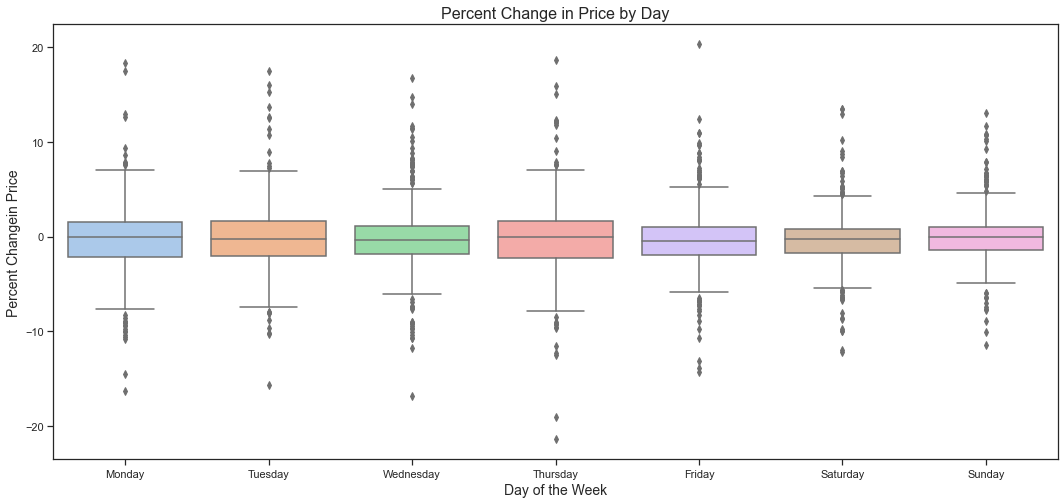

In [74]:
fig, ax = plt.subplots(figsize=(18,8))

boxplot = sns.boxplot(
    x="day_of_week", 
    y='pct_chng', 
    data=df_btc_clean,
    order=day_names,
)

boxplot.axes.set_title("Percent Change in Price by Day", fontsize=16)
boxplot.set_xlabel("Day of the Week", fontsize=14)
boxplot.set_ylabel("Percent Changein Price", fontsize=14)

plt.show()

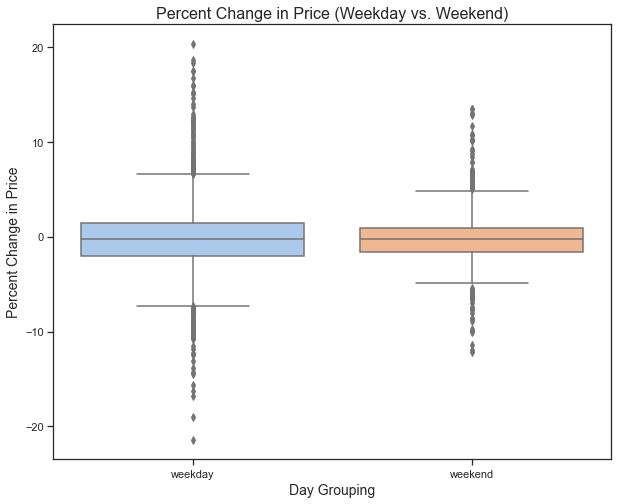

In [86]:
fig, ax = plt.subplots(figsize=(10,8))

boxplot = sns.boxplot(
    x="day_grp", 
    y='pct_chng', 
    data=df_btc_clean,
)

boxplot.axes.set_title("Percent Change in Price (Weekday vs. Weekend)", fontsize=16)
boxplot.set_xlabel("Day Grouping", fontsize=14)
boxplot.set_ylabel("Percent Change in Price", fontsize=14)

plt.show()

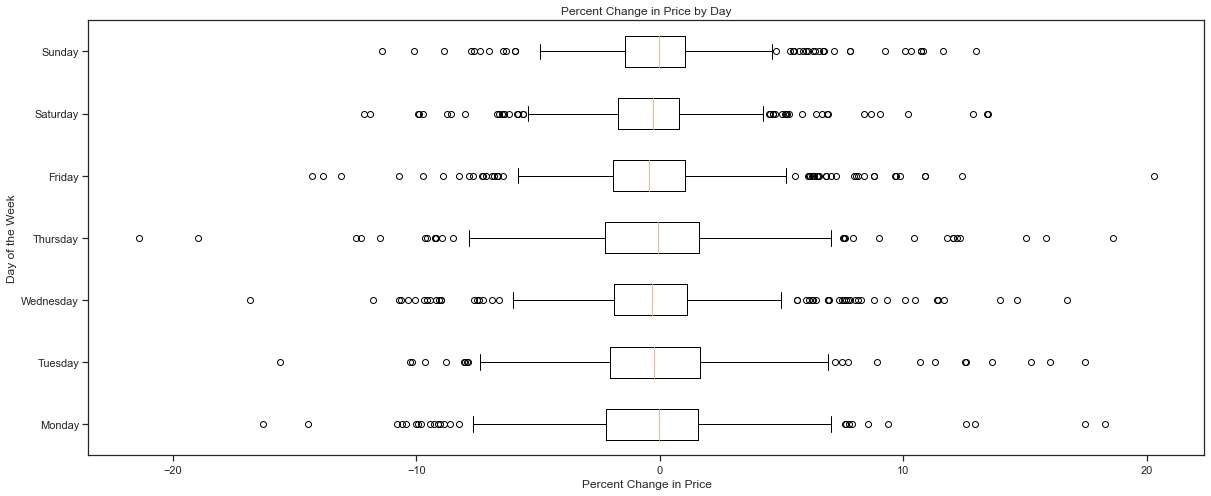

In [79]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(20,8))

plots = [
    df_btc_clean[df_btc_clean['day_of_week'] == 'Monday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Tuesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Wednesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Thursday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Friday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Saturday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Sunday']['pct_chng']
]
ax.boxplot(plots, vert=False, labels=day_names)

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Day of the Week')

plt.show()

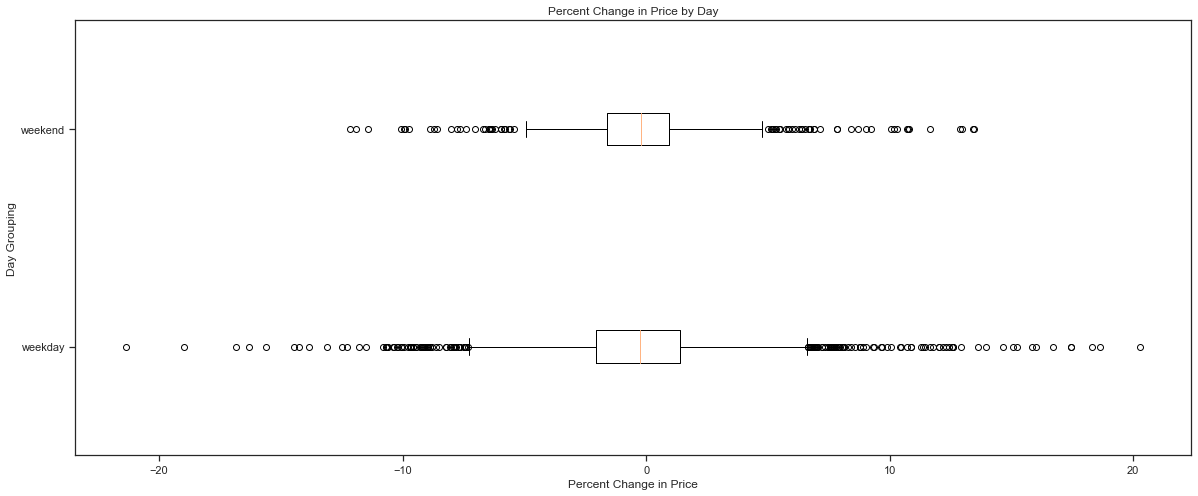

In [80]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(20,8))

plots = [
    df_btc_clean[df_btc_clean['day_grp'] == 'weekday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_grp'] == 'weekend']['pct_chng'],
]
ax.boxplot(plots, vert=False, labels=['weekday','weekend'])

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Day Grouping')

plt.show()

### Histograms

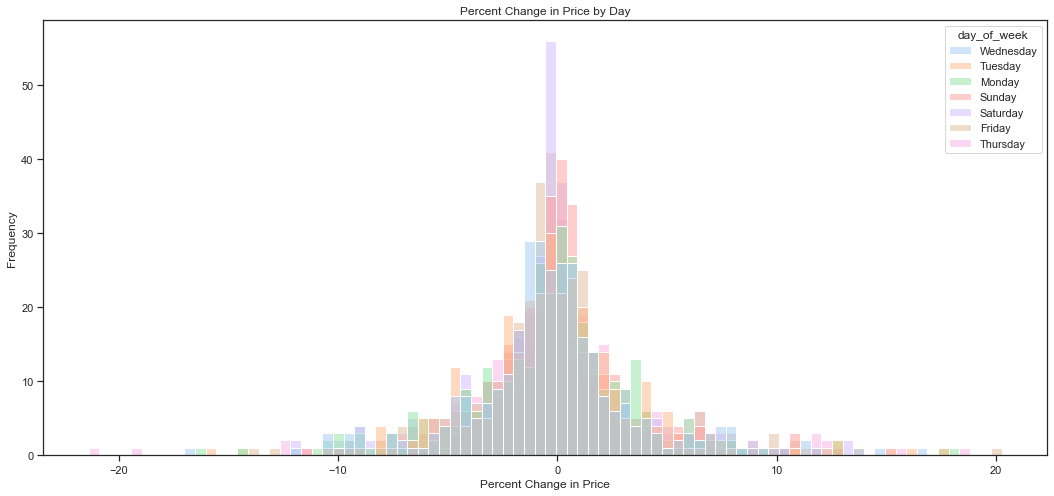

In [85]:
fig, ax = plt.subplots(figsize=(18,8))

sns.histplot(
    data=df_btc_clean, 
    x="pct_chng", 
    hue="day_of_week",
    # element="step"
    # multiple="stack"
)

ax.set_title('Percent Change in Price by Day')
ax.set_xlabel('Percent Change in Price')
ax.set_ylabel('Frequency')

plt.show()